Цели и задачи: провести разведывательный анализ датафрейма, подготовить его для дальнейшего построения модели.

In [532]:
# Подготовительный набор

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind


'''Функция, выводящая общую информацию о числовых столбцах'''


def numcol_review(column_name):
    a = sns.distplot(stud[column_name])
    b = stud[column_name].describe()
    c = print('NaN = ', stud[column_name].isnull().sum())
    return a, b, c


'''Функция, выводящая общую информацию о категориальных столбцах
(в том числе тех, где категории выражены числами)'''


def catcol_review(column_name):
    a = sns.countplot(x=column_name, data=stud)
    b = stud[column_name].value_counts(dropna=False)
    c = print('Уникальных значений: ', stud[column_name].nunique())
    return a, b, c


'''Функция, фильтрующая выбросы'''


def surges(column_name, rangefrom, rangeto):
    median = stud[column_name].median()
    IQR = stud[column_name].quantile(0.75) - stud[column_name].quantile(0.25)
    perc25 = stud[column_name].quantile(0.25)
    perc75 = stud[column_name].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    stud[column_name].loc[stud[column_name].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16,
                                                                                              range=(
                                                                                                  rangefrom, rangeto),
                                                                                              label='IQR')
    plt.legend()


'''Функция, выбирающая номинативные столбцы со статистически значимыми соответствиями
по отношению к целевому числовому столбцу (в данном случае это 'score')'''


def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


'''Функция для построения боксплотов: данные номинативных 
столбцов по отношению к количеству баллов'''


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

'''Функция, показывающая количество NaN по столбцам и общую их сумму  
и процентное содержание в датафрейме.'''
def num_nans(df):
    num_nans = df.size - df.count().sum() #общая сумма NAN в датафрейме
    print('Суммарное количество NaN в датафрейме ', num_nans, 
         ' или ', round(((num_nans/df.size)*100),2), '%.')
    print(df.isnull().sum())
    

sns.set()
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

Сначала бросим взгляд на нашу саванну с высоты птичьего полёта. Видим, что пропусков (NaN) в датафрейме около 5 процентов; номинативных столбцов чуть больше, чем числовых.

In [533]:
display(stud.sample(10))
display(stud.info())
num_nans(stud)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
358,MS,M,18,U,LE3,T,1.0,1.0,other,services,home,father,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,yes,3.0,3.0,2.0,3.0,4.0,50.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
309,GP,F,19,U,LE3,T,1.0,1.0,at_home,NaN,reputation,other,1.0,2.0,1.0,yes,yes,NaN,yes,no,-6.0,yes,yes,no,NaN,4.0,3.0,3.0,18.0,50.0
324,GP,F,17,U,LE3,T,0.0,2.0,at_home,at_home,home,father,2.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,75.0
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0
189,GP,M,17,R,GT3,T,1.0,2.0,at_home,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,no,3.0,1.0,3.0,NaN,4.0,50.0
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0
206,GP,F,16,U,GT3,A,3.0,1.0,services,other,course,mother,1.0,2.0,3.0,no,yes,yes,no,yes,-6.0,yes,yes,no,2.0,3.0,3.0,4.0,5.0,35.0
124,GP,F,16,U,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,yes,no,yes,-6.0,yes,yes,yes,5.0,4.0,4.0,5.0,0.0,40.0
389,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,-6.0,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

Суммарное количество NaN в датафрейме  565  или  4.77 %.
school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64


In [534]:
stud.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [535]:
stud.describe(include=['int64', 'float64'])

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


### Столбец score
Начнём с главного объекта - баллов за экзамен.
Мы видим, что часть студентов получила 0 баллов, вероятно, это те, которые либо не пришли на экзамен либо сдали пустые формы. Те, кто писал хоть что-то, получили не менее 20 баллов. Поэтому сказать об успеваемости студентов, получивших 0 баллов, мы ничего не можем. Удалим строчки с ними из датафрейма. 
То же самое относится к NaN, так что удаляем также строчки, которые содержат NaN в столбце score.


NaN =  6


(<matplotlib.axes._subplots.AxesSubplot at 0x19b86c25c08>,
 count    389.000000
 mean      52.262211
 std       22.919022
 min        0.000000
 25%       40.000000
 50%       55.000000
 75%       70.000000
 max      100.000000
 Name: score, dtype: float64,
 None)

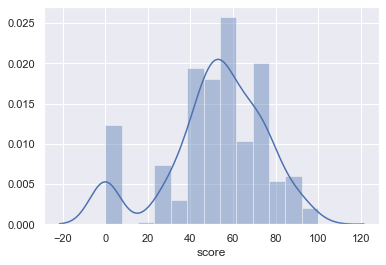

In [536]:
numcol_review('score')

In [537]:
# Удаляем строки с NaN и строки, где score=0
stud.dropna(axis=0, subset=['score'], inplace=True)
stud = stud.drop(stud[stud.score == 0].index)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               352 non-null    object 
 1   sex                  352 non-null    object 
 2   age                  352 non-null    int64  
 3   address              338 non-null    object 
 4   famsize              328 non-null    object 
 5   Pstatus              311 non-null    object 
 6   Medu                 350 non-null    float64
 7   Fedu                 331 non-null    float64
 8   Mjob                 335 non-null    object 
 9   Fjob                 320 non-null    object 
 10  reason               337 non-null    object 
 11  guardian             323 non-null    object 
 12  traveltime           329 non-null    float64
 13  studytime            345 non-null    float64
 14  failures             332 non-null    float64
 15  schoolsup            343 non-null    obj

NaN =  0


(<matplotlib.axes._subplots.AxesSubplot at 0x19b86d1be88>,
 count    352.000000
 mean      57.755682
 std       16.200928
 min       20.000000
 25%       45.000000
 50%       55.000000
 75%       70.000000
 max      100.000000
 Name: score, dtype: float64,
 None)

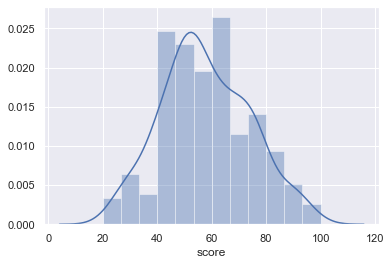

In [538]:
numcol_review('score')

Получаем нормальное распределение без выбросов.

In [539]:
stud.score.value_counts()

50.0     54
55.0     46
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Остальные числовые столбцы являются, по сути, категориальными, где категории для удобства заменены цифрами. Разберём их поочерёдно.

### Столбец age.
Большинство студентов - тинейджеры, всего 2 старше 20.


Уникальных значений:  8


(<matplotlib.axes._subplots.AxesSubplot at 0x19b86d87fc8>,
 16    96
 17    90
 15    76
 18    69
 19    16
 20     3
 22     1
 21     1
 Name: age, dtype: int64,
 None)

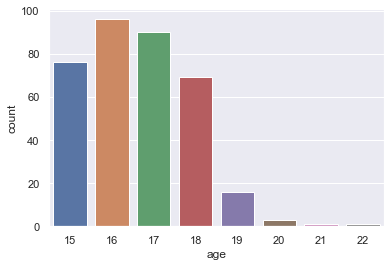

In [540]:
catcol_review('age')

## Столбец Medu (образование матери).
В сумме больше матерей с неполным и полным средним образованием, чем с высшим. 

Уникальных значений:  5


(<matplotlib.axes._subplots.AxesSubplot at 0x19b87e05cc8>,
 4.0    125
 2.0     88
 3.0     87
 1.0     47
 0.0      3
 NaN      2
 Name: Medu, dtype: int64,
 None)

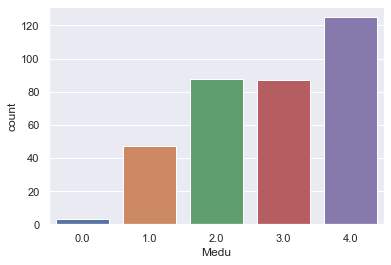

In [541]:
catcol_review('Medu')

### Столбец Fedu (образовние отца).
Имеем выброс, вероятно, опечатка. Поскольку данные распределены по 5 категориям (0-4), отфильтровать выброс будет легко: убираем всё, что больше 4. После фильтрования видим, что среди мужчин также преобладают родители со средним образованием, причём сильнее, чем у женщин.


Уникальных значений:  6


(<matplotlib.axes._subplots.AxesSubplot at 0x19b87e6c948>,
 2.0     94
 3.0     89
 4.0     80
 1.0     65
 NaN     21
 0.0      2
 40.0     1
 Name: Fedu, dtype: int64,
 None)

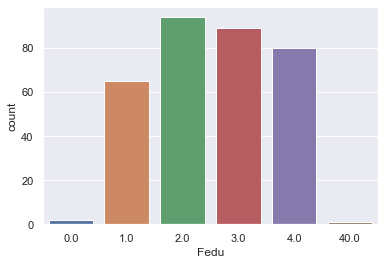

In [542]:
catcol_review('Fedu')

Уникальных значений:  5


(<matplotlib.axes._subplots.AxesSubplot at 0x19b847e00c8>,
 2.0    94
 3.0    89
 4.0    80
 1.0    65
 0.0     2
 Name: Fedu, dtype: int64,
 None)

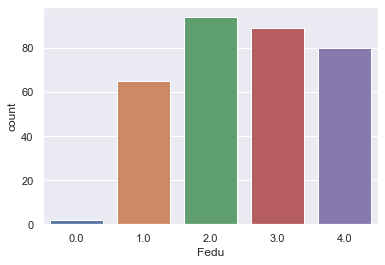

In [543]:
stud = stud.loc[stud.Fedu <= 4]  # Фильтруем выбросы
catcol_review('Fedu')

### Столбец traveltime
Тут выбросов нет. Большинство студентов живут рядом со школой.

Уникальных значений:  4


(<matplotlib.axes._subplots.AxesSubplot at 0x19b87f11f48>,
 1.0    203
 2.0     82
 NaN     22
 3.0     16
 4.0      7
 Name: traveltime, dtype: int64,
 None)

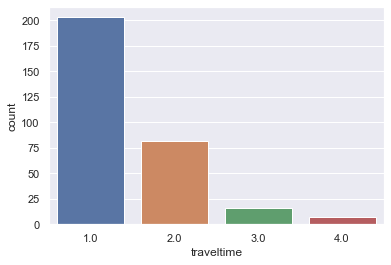

In [544]:
catcol_review('traveltime')

### Столбец studytime
Четыре категории, большинство студентов тратят на внеклассное обучение 2,5 часа в неделю.

Уникальных значений:  4


(<matplotlib.axes._subplots.AxesSubplot at 0x19b87f83808>,
 2.0    162
 1.0     86
 3.0     52
 4.0     23
 NaN      7
 Name: studytime, dtype: int64,
 None)

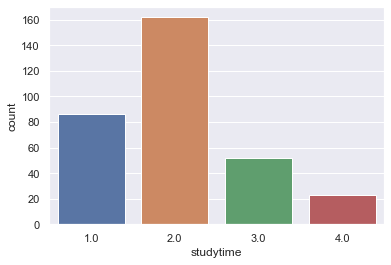

In [545]:
catcol_review('studytime')

### Столбец failures
Что подразумевается под внеучебными неудачами, неизвестно, а значит, толку нам от этого столбца пока что никакого. Единственно, что понятно по графику - n преимущественно больше 3, что бы это ни значило.

Уникальных значений:  4


(<matplotlib.axes._subplots.AxesSubplot at 0x19b87fe9b88>,
 0.0    258
 1.0     35
 NaN     17
 2.0     10
 3.0     10
 Name: failures, dtype: int64,
 None)

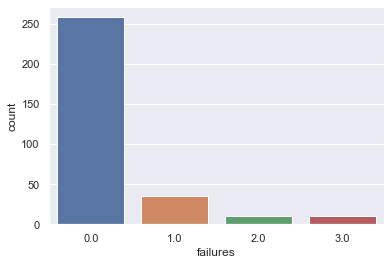

In [546]:
catcol_review('failures')

### Столбец studytime, granular
Про эти данные мы не знаем вообще ничего. Что это за зернистое время учёбы? Время, потраченное на отделные предметы? Какие? Может, потом выясним.

Уникальных значений:  4


(<matplotlib.axes._subplots.AxesSubplot at 0x19b88035a88>,
 -6.0     162
 -3.0      86
 -9.0      52
 -12.0     23
  NaN       7
 Name: studytime, granular, dtype: int64,
 None)

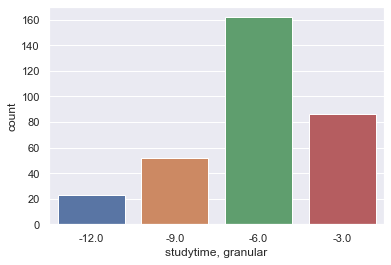

In [547]:
catcol_review('studytime, granular')

### Столбец famrel
У большинства студентов отношения в семье хорошие. Если студенты не врут, конечно.

Уникальных значений:  6


(<matplotlib.axes._subplots.AxesSubplot at 0x19b880af9c8>,
  4.0    151
  5.0     84
  3.0     54
  NaN     21
  2.0     13
  1.0      6
 -1.0      1
 Name: famrel, dtype: int64,
 None)

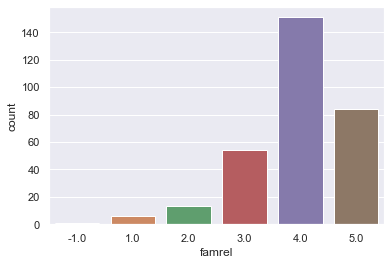

In [548]:
catcol_review('famrel')

Видим выброс - уничтожаем выброс.


In [549]:
stud = stud.loc[stud.famrel >= 1]

Уникальных значений:  5


(<matplotlib.axes._subplots.AxesSubplot at 0x19b8811ebc8>,
 4.0    151
 5.0     84
 3.0     54
 2.0     13
 1.0      6
 Name: famrel, dtype: int64,
 None)

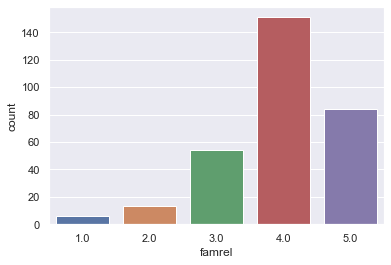

In [550]:
catcol_review('famrel')

### Столбец freetime
У большинства студентов свободного времени не то чтобы очень мало, но и не очень много)

Уникальных значений:  5


(<matplotlib.axes._subplots.AxesSubplot at 0x19b881817c8>,
 3.0    116
 4.0     89
 2.0     51
 5.0     31
 1.0     15
 NaN      6
 Name: freetime, dtype: int64,
 None)

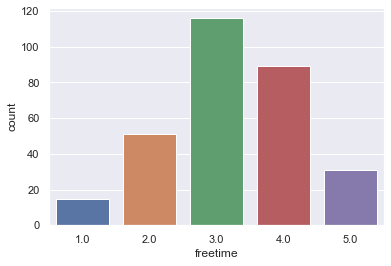

In [551]:
catcol_review('freetime')

### Столбец goout
Как и ожидалось, распределение очень похоже на freetime.

Уникальных значений:  5


(<matplotlib.axes._subplots.AxesSubplot at 0x19b881e26c8>,
 3.0    106
 2.0     81
 4.0     62
 5.0     37
 1.0     16
 NaN      6
 Name: goout, dtype: int64,
 None)

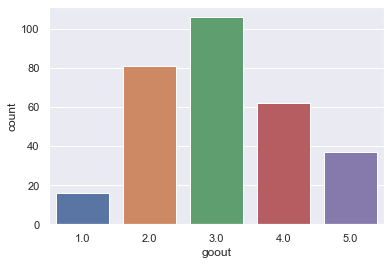

In [552]:
catcol_review('goout')

### Столбец health
А здоровье почти у половины студентов не очень: то лапы ломит, то хвост отваливается.

Уникальных значений:  5


(<matplotlib.axes._subplots.AxesSubplot at 0x19b8824be08>,
 5.0    100
 3.0     74
 4.0     48
 1.0     40
 2.0     34
 NaN     12
 Name: health, dtype: int64,
 None)

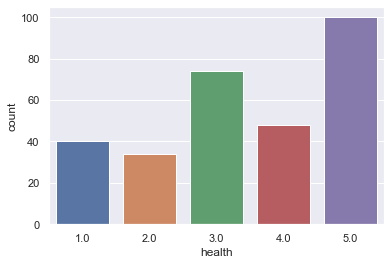

In [553]:
catcol_review('health')

### Столбец absences	
Кто-то пропустил 4 занятия, а кто-то 400... Подозрительно похоже на выбросы. Хотя для точности желательно знать количество занятий. А то вдруг действительно есть суперпрогульщики. 

NaN =  10


(<matplotlib.axes._subplots.AxesSubplot at 0x19b88297e88>,
 count    298.000000
 mean       8.104027
 std       26.052380
 min        0.000000
 25%        2.000000
 50%        4.000000
 75%        8.000000
 max      385.000000
 Name: absences, dtype: float64,
 None)

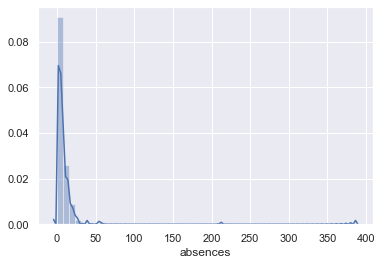

In [554]:
numcol_review('absences')

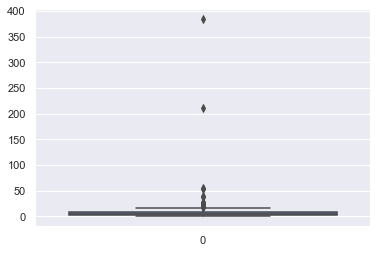

In [555]:
sns.boxplot(data=stud.absences)

Фильтруем выбросы.


25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


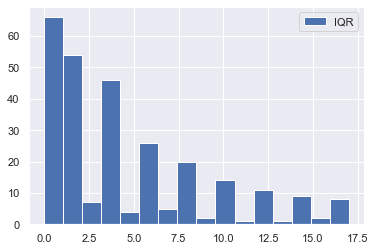

In [556]:
surges('absences', 0, 17)

In [557]:
stud = stud.loc[stud.absences <= 17]  # Удаляем строки с выбросами

Уникальных значений:  18


(<matplotlib.axes._subplots.AxesSubplot at 0x19b88495808>,
 0.0     64
 2.0     54
 4.0     46
 6.0     26
 8.0     20
 10.0    14
 12.0    11
 14.0     9
 16.0     7
 3.0      7
 7.0      5
 5.0      4
 15.0     2
 1.0      2
 9.0      2
 11.0     1
 13.0     1
 17.0     1
 Name: absences, dtype: int64,
 None)

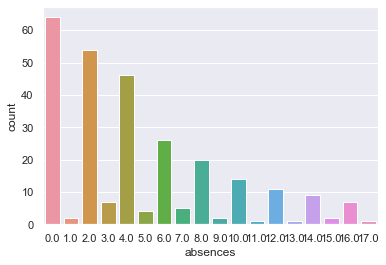

In [558]:
catcol_review('absences')

Забавно, похоже, что студенты предпочитают пропускать чётное количество занятий.

Посмотрим ещё раз на гистограмму баллов. А то мы там поудаляли кучу всего, может, распределение теперь резко изменилось. Но нет, всё примерно в той же поре.

NaN =  0


(<matplotlib.axes._subplots.AxesSubplot at 0x19b89515d08>,
 count    276.000000
 mean      57.844203
 std       15.461659
 min       25.000000
 25%       50.000000
 50%       55.000000
 75%       70.000000
 max      100.000000
 Name: score, dtype: float64,
 None)

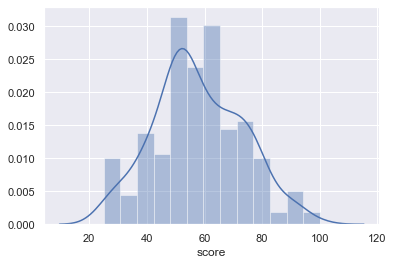

In [559]:
numcol_review('score')

Переходим к качественным данным

### Столбец school

Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b89583308>,
 GP    242
 MS     34
 Name: school, dtype: int64,
 None)

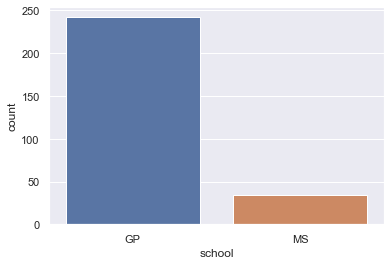

In [560]:
catcol_review('school')

### Столбец sex
Почти поровну студентов мужского и женского пола


Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b895eee08>,
 F    144
 M    132
 Name: sex, dtype: int64,
 None)

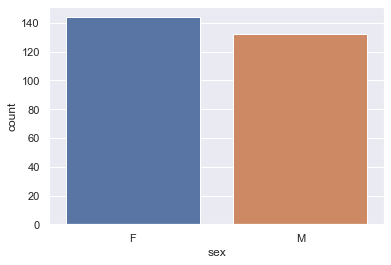

In [561]:
catcol_review('sex')

### Столбец address
Значительное большинство студентов живут в городе

Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b89646ec8>,
 U      206
 R       60
 NaN     10
 Name: address, dtype: int64,
 None)

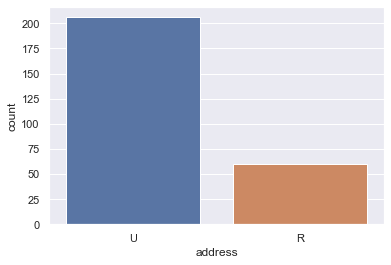

In [562]:
catcol_review('address')

### Столбец famsize
Большинство студентов из многодетных и/или полных семей

Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b8969e1c8>,
 GT3    179
 LE3     81
 NaN     16
 Name: famsize, dtype: int64,
 None)

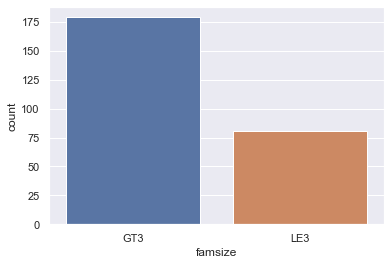

In [563]:
catcol_review('famsize')

### Столбец Pstatus
У подавляющего большинства студентов родители живут вместе

Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b896fa9c8>,
 T      222
 NaN     30
 A       24
 Name: Pstatus, dtype: int64,
 None)

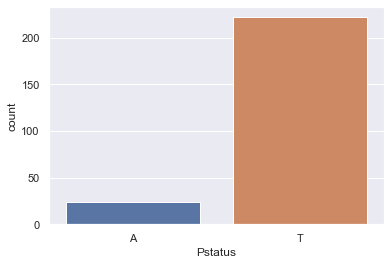

In [564]:
catcol_review('Pstatus')

### Столбец Mjob


Уникальных значений:  5


(<matplotlib.axes._subplots.AxesSubplot at 0x19b897456c8>,
 other       90
 services    67
 at_home     42
 teacher     37
 health      26
 NaN         14
 Name: Mjob, dtype: int64,
 None)

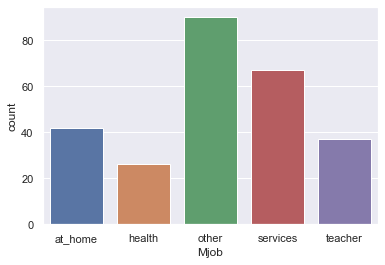

In [565]:
catcol_review('Mjob')

### Столбец Fjob

Уникальных значений:  5


(<matplotlib.axes._subplots.AxesSubplot at 0x19b89798ec8>,
 other       143
 services     69
 NaN          24
 teacher      19
 at_home      12
 health        9
 Name: Fjob, dtype: int64,
 None)

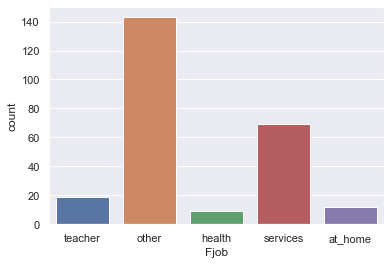

In [566]:
catcol_review('Fjob')

### Столбец reason
Большинство выбриает школу с хорошей программой и репутацией, и чтобы от дома недалеко.

Уникальных значений:  4


(<matplotlib.axes._subplots.AxesSubplot at 0x19b89810f08>,
 course        93
 reputation    75
 home          67
 other         28
 NaN           13
 Name: reason, dtype: int64,
 None)

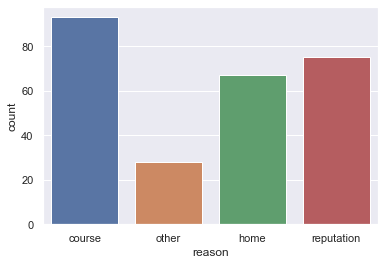

In [567]:
catcol_review('reason')

### Столбец guardian

Уникальных значений:  3


(<matplotlib.axes._subplots.AxesSubplot at 0x19b89869d88>,
 mother    174
 father     62
 NaN        26
 other      14
 Name: guardian, dtype: int64,
 None)

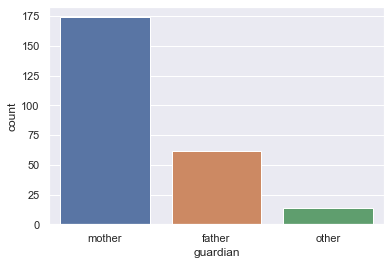

In [568]:
catcol_review('guardian')

### Столбец schoolsup

Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b898c50c8>,
 no     230
 yes     37
 NaN      9
 Name: schoolsup, dtype: int64,
 None)

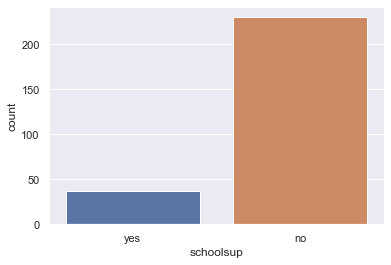

In [569]:
catcol_review('schoolsup')

### Столбец famsup

Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b898e48c8>,
 yes    147
 no     103
 NaN     26
 Name: famsup, dtype: int64,
 None)

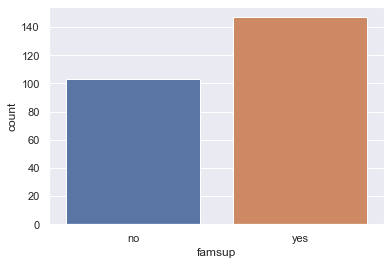

In [570]:
catcol_review('famsup')

### Столбец paid

Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b89975988>,
 no     132
 yes    114
 NaN     30
 Name: paid, dtype: int64,
 None)

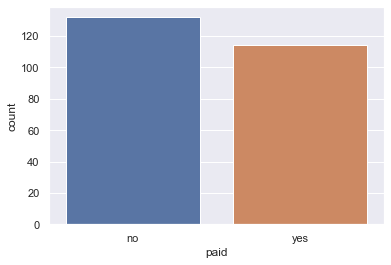

In [571]:
catcol_review('paid')

### Столбец activities


Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b899c8b48>,
 yes    138
 no     127
 NaN     11
 Name: activities, dtype: int64,
 None)

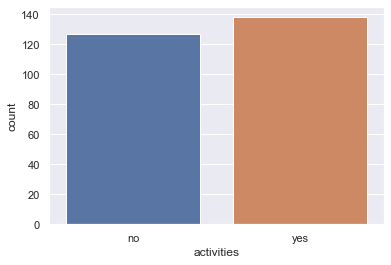

In [572]:
catcol_review('activities')

### Столбец nursery

Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b89a286c8>,
 yes    209
 no      55
 NaN     12
 Name: nursery, dtype: int64,
 None)

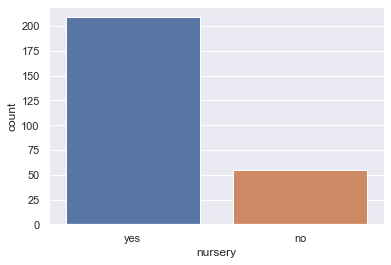

In [573]:
catcol_review('nursery')

### Столбец higher

Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b89a84808>,
 yes    252
 NaN     14
 no      10
 Name: higher, dtype: int64,
 None)

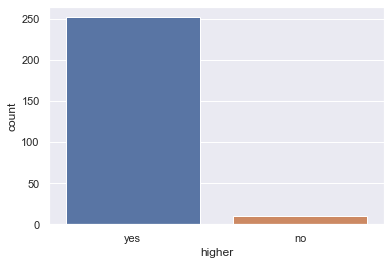

In [574]:
catcol_review('higher')

### Столбец internet	

Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b89acfc08>,
 yes    208
 no      43
 NaN     25
 Name: internet, dtype: int64,
 None)

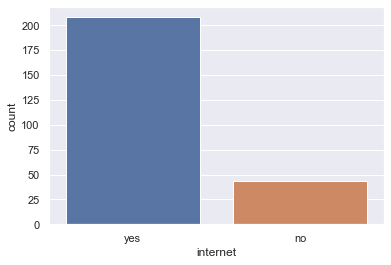

In [575]:
catcol_review('internet')

### Столбец romantic
Правильно, в 15-17 лет учиться надо. Романтику потом в универе наверстают.

Уникальных значений:  2


(<matplotlib.axes._subplots.AxesSubplot at 0x19b89b31808>,
 no     175
 yes     77
 NaN     24
 Name: romantic, dtype: int64,
 None)

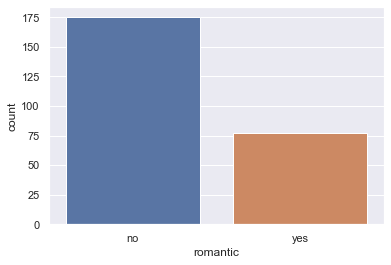

In [576]:
catcol_review('romantic')

Что ж, посмотрим, что получается с корреляцией в числовых столбцах. В примере с шоколадом учитывались даже сотые доли, но тут мы их, наверное, выкинем, так как большая часть коррелирует с точностью до десятых. Итак, убираем freetime, famrel и health. Максимальная обратная корреляция у нас наблюдается с тем самым таинственым failures, поэтому придётся этот столбец оставить, что бы сей параметр ни означал. Ещё мы можем видеть, что studytime и studytime granular имеют одинаковую по модулю корреляцию, так что один из этих столбцов можно удалить, например, второй.
Cтранный момент: несмотря на похожесть распределения на диаграмме, мы видим, что корреляция goout по модулю очень сильно выше, чем freetime.
Итого, числовых столбцов у нас остаётся 13-4=9.

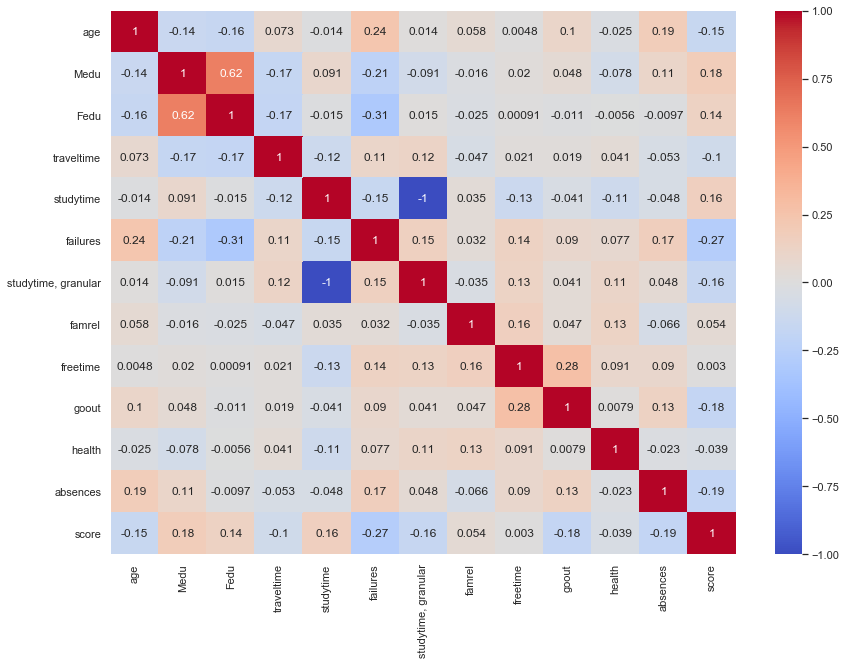

In [577]:
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(stud.corr(), cmap='coolwarm', annot=True)

Теперь обратно к номинативным столбцам. Статистически значимые различия нашлись для четырёх из них. 

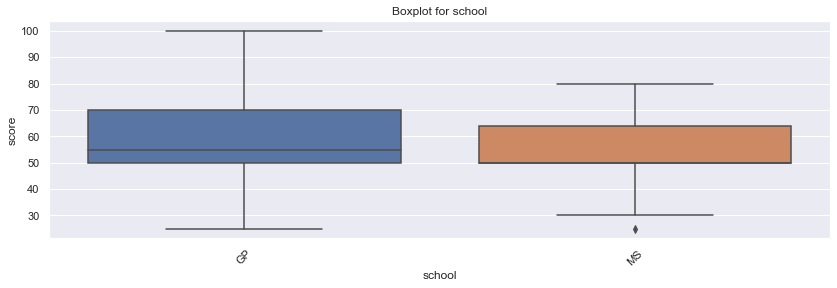

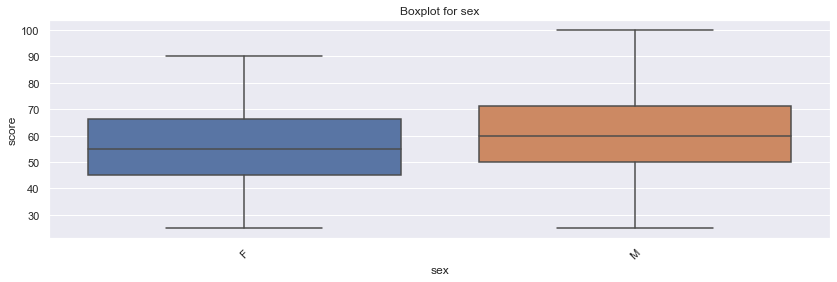

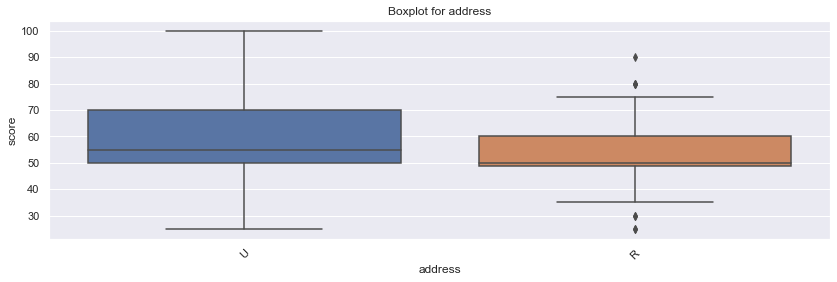

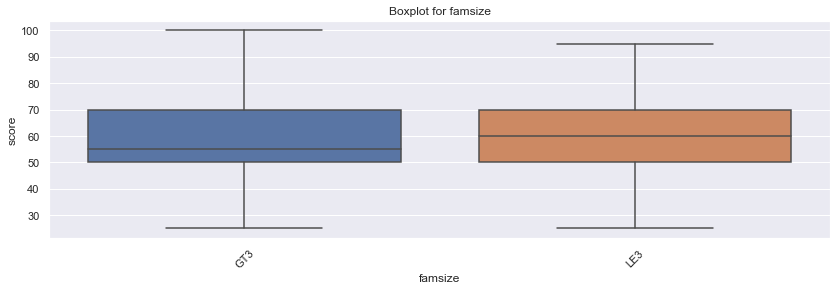

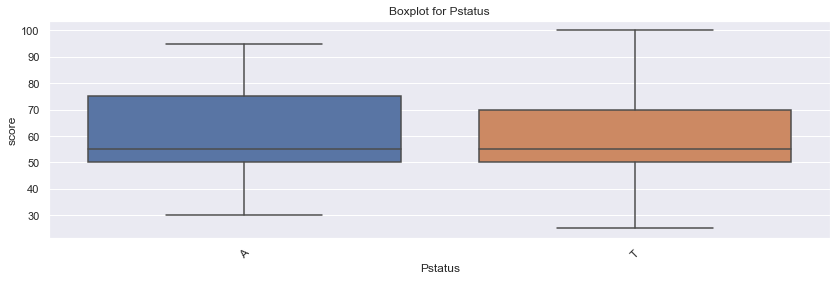

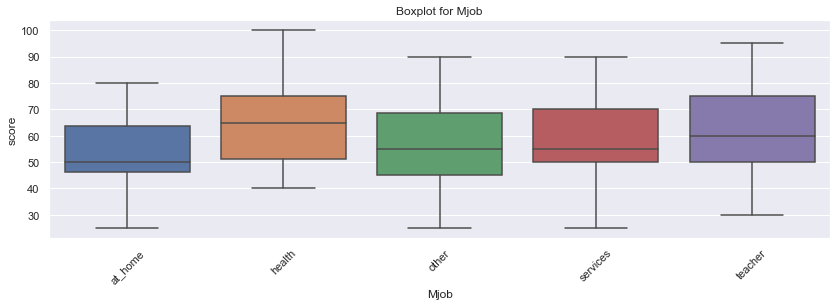

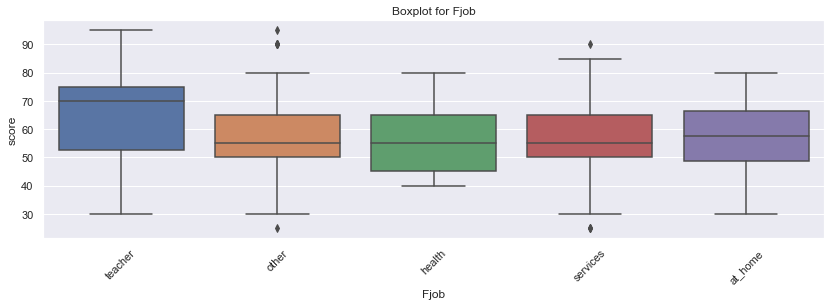

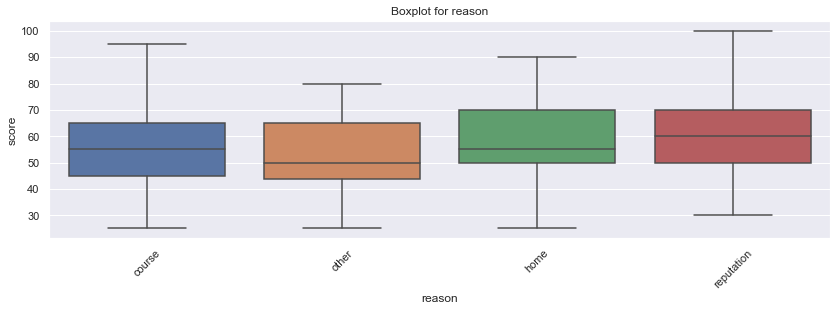

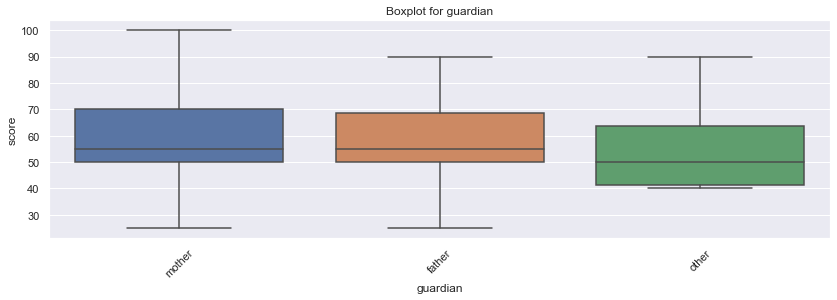

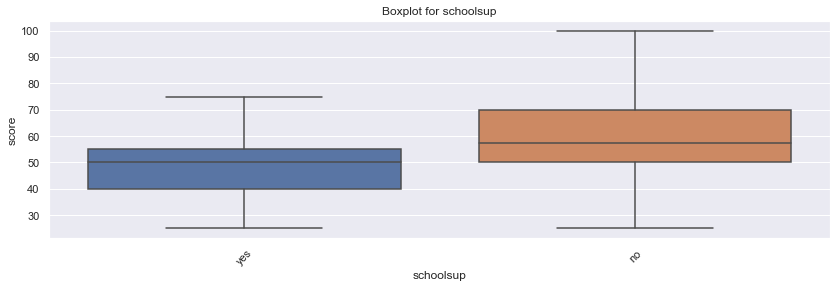

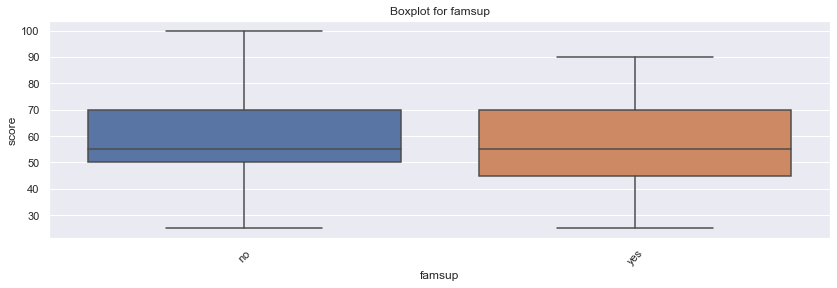

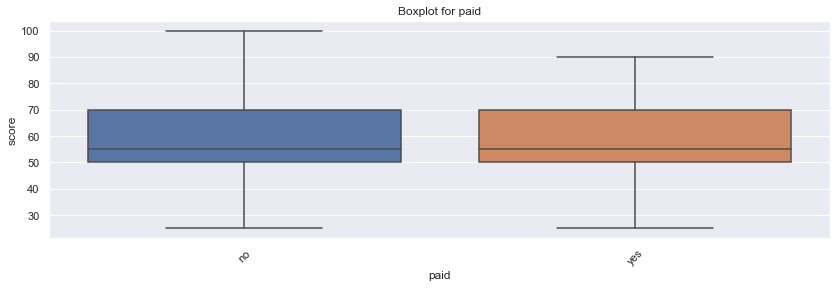

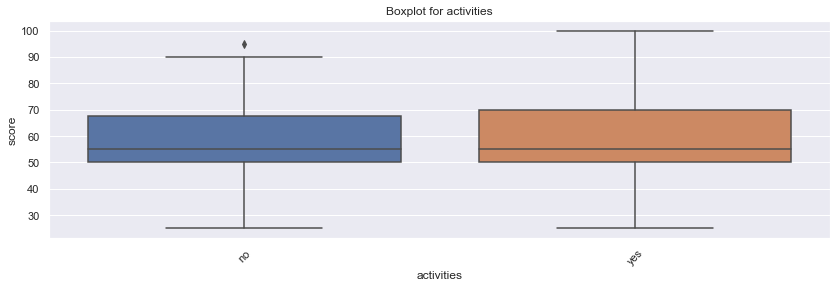

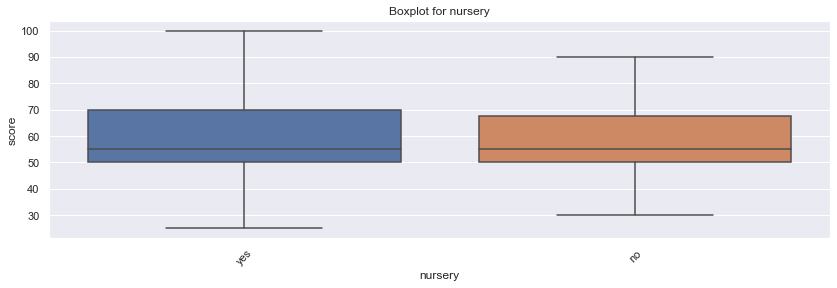

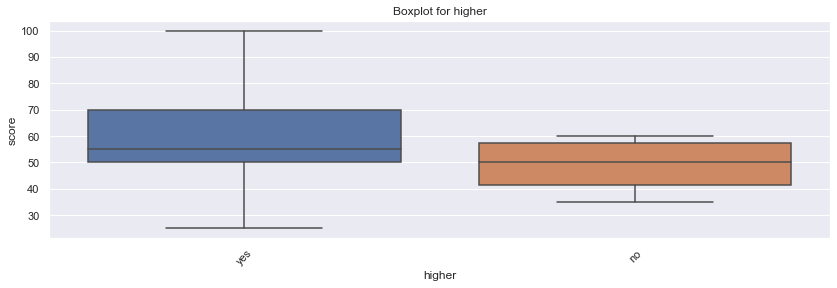

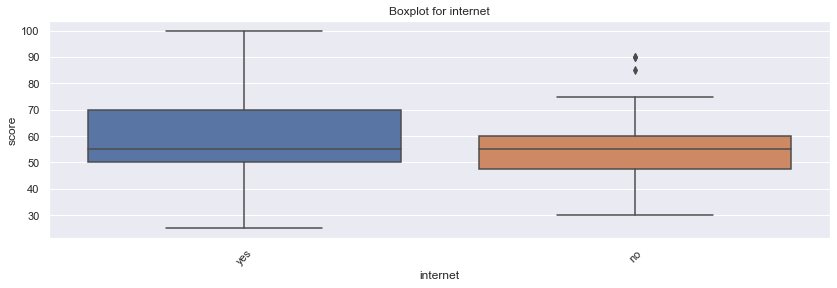

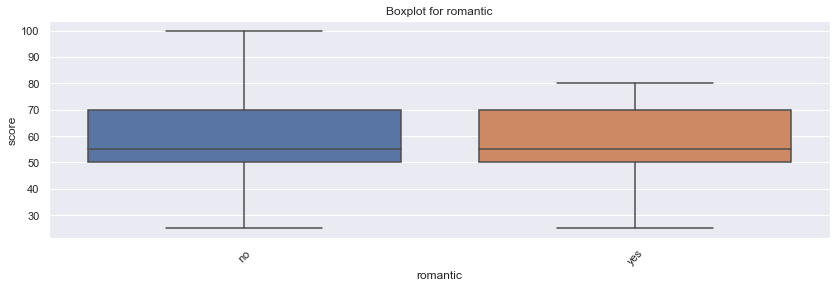

In [578]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [579]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


Изменяем датафрейм в соответствии с проведённым анализом, должно остаться 13 столбцов.

In [580]:
stud.drop(['school', 'famsize', 'Pstatus', 'Fjob', 'reason', 'guardian', 'famsup', 'paid', 'activities', 'nursery',
           'higher', 'internet', 'romantic', 'studytime, granular', 'famrel', 'freetime', 'health'], inplace=True, axis=1)
display(stud.sample(10))

,sex,age,address,Medu,Fedu,Mjob,traveltime,studytime,failures,schoolsup,goout,absences,score
305,F,18,U,2.0,4.0,services,1.0,2.0,1.0,no,3.0,8.0,60.0
354,M,17,NaN,4.0,3.0,services,2.0,2.0,0.0,no,5.0,4.0,55.0
255,M,17,U,1.0,1.0,health,2.0,1.0,1.0,no,4.0,2.0,40.0
15,F,16,U,4.0,4.0,health,1.0,1.0,0.0,no,4.0,4.0,70.0
122,F,16,U,2.0,4.0,other,2.0,2.0,0.0,no,2.0,2.0,65.0
288,M,18,U,2.0,1.0,services,1.0,3.0,0.0,no,4.0,6.0,70.0
223,M,18,U,2.0,2.0,other,2.0,2.0,0.0,no,3.0,0.0,65.0
165,M,16,U,3.0,2.0,services,2.0,1.0,1.0,no,2.0,16.0,60.0
68,F,15,R,2.0,2.0,health,NaN,2.0,NaN,yes,3.0,2.0,40.0
268,M,18,U,4.0,2.0,NaN,NaN,2.0,0.0,no,5.0,10.0,50.0


In [581]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 394
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         276 non-null    object 
 1   age         276 non-null    int64  
 2   address     266 non-null    object 
 3   Medu        274 non-null    float64
 4   Fedu        276 non-null    float64
 5   Mjob        262 non-null    object 
 6   traveltime  256 non-null    float64
 7   studytime   271 non-null    float64
 8   failures    261 non-null    float64
 9   schoolsup   267 non-null    object 
 10  goout       271 non-null    float64
 11  absences    276 non-null    float64
 12  score       276 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 40.2+ KB


In [582]:
num_nans(stud)

Суммарное количество NaN в датафрейме  80  или  2.23 %.
sex            0
age            0
address       10
Medu           2
Fedu           0
Mjob          14
traveltime    20
studytime      5
failures      15
schoolsup      9
goout          5
absences       0
score          0
dtype: int64


### Выводы
* В датафрейме довольно мало пустых значений, менее 5 процентов.
* Выбросы найдены только в трёх столбцах, то есть данные относительно чистые.
* Наибольшая корреляция обнаружена с параметром failures, поэтому желательно разобраться поточнее, что это за параметр.
* Из тридцати предложенных параметров выбраны 13, которые предполагается использовать в дальнейшем для построения модели.